In [ ]:
!gdown 1P79MIZ1B_gwaW5Cdj3uVzSWzkktPhRsO

Downloading...
From: https://drive.google.com/uc?id=1P79MIZ1B_gwaW5Cdj3uVzSWzkktPhRsO
To: /content/new_data.zip
100% 677M/677M [00:10<00:00, 66.5MB/s]


In [ ]:
!unzip new_data

Archive:  new_data.zip
   creating: new_data/mask/
  inflating: new_data/mask/s1_mask.png  
  inflating: new_data/mask/s10_mask.png  
  inflating: new_data/mask/s100_mask.png  
  inflating: new_data/mask/s101_mask.png  
  inflating: new_data/mask/s102_mask.png  
  inflating: new_data/mask/s103_mask.png  
  inflating: new_data/mask/s104_mask.png  
  inflating: new_data/mask/s105_mask.png  
  inflating: new_data/mask/s106_mask.png  
  inflating: new_data/mask/s107_mask.png  
  inflating: new_data/mask/s108_mask.png  
  inflating: new_data/mask/s109_mask.png  
  inflating: new_data/mask/s11_mask.png  
  inflating: new_data/mask/s110_mask.png  
  inflating: new_data/mask/s111_mask.png  
  inflating: new_data/mask/s112_mask.png  
  inflating: new_data/mask/s113_mask.png  
  inflating: new_data/mask/s114_mask.png  
  inflating: new_data/mask/s115_mask.png  
  inflating: new_data/mask/s116_mask.png  
  inflating: new_data/mask/s117_mask.png  
  inflating: new_data/mask/s118_mask.png  
  infla

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
#Importing required libraries.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as image
import cv2
import os
#from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Conv2DTranspose,Input,Add,UpSampling2D,Dropout,concatenate
from keras.layers import *
from keras.models import Model
import random
import math

In [ ]:
image_list=os.listdir("/content/new_data/Sample/")
image_list=[filename.split(".")[0]for filename in image_list]

In [ ]:
def preprocess_img(img):
    img=cv2.resize(img,(512,512))
    return img

def visualize(img,seg_img):
    """
    Visualizes image
    """
    # img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(20,20))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title('Image')
    plt.subplot(1,2,2)
    plt.imshow(seg_img,cmap="gray")
    plt.title('Segmented Image')
    plt.show()

def roundup(x):
    return int(math.ceil(x / 10.0)) * 10
    
def get_segmented_img(img,n_classes):
    """
    Loads in the segmented image and create suitable segmentation label.
    """
    seg_labels=np.zeros((512,512,1))
    img=cv2.resize(img,(512,512))
    img=img[:,:,0]
    cl_list=[0,24]

    
    seg_labels[:,:,0]=(img!=0).astype(int)


    return seg_labels
def pad_img(img):
	old_h,old_w=img.shape[0],img.shape[1]

	#Pad the height.

	#If height is less than 512 then pad to 512
	if old_h<512:
		to_pad=np.ones((512-old_h,old_w))*255
		img=np.concatenate((img,to_pad))
		new_height=512
	else:
	#If height >512 then pad to nearest 10.
		to_pad=np.ones((roundup(old_h)-old_h,old_w))*255
		img=np.concatenate((img,to_pad))
		new_height=roundup(old_h)

	#Pad the width.
	if old_w<512:
		to_pad=np.ones((new_height,512-old_w))*255
		img=np.concatenate((img,to_pad),axis=1)
		new_width=512
	else:
		to_pad=np.ones((new_height,roundup(old_w)-old_w))*255
		img=np.concatenate((img,to_pad),axis=1)
		new_width=roundup(old_w)-old_w
	return img


def pad_seg(img):
	old_h,old_w=img.shape[0],img.shape[1]

	#Pad the height.

	#If height is less than 512 then pad to 512
	if old_h<512:
		to_pad=np.zeros((512-old_h,old_w))
		img=np.concatenate((img,to_pad))
		new_height=512
	else:
	#If height >512 then pad to nearest 10.
		to_pad=np.zeros((roundup(old_h)-old_h,old_w))
		img=np.concatenate((img,to_pad))
		new_height=roundup(old_h)

	#Pad the width.
	if old_w<512:
		to_pad=np.zeros((new_height,512-old_w))
		img=np.concatenate((img,to_pad),axis=1)
		new_width=512
	else:
		to_pad=np.zeros((new_height,roundup(old_w)-old_w))
		img=np.concatenate((img,to_pad),axis=1)
		new_width=roundup(old_w)-old_w
	return img



def batch_generator(filelist,n_classes,batch_size):
  while True:
    X=[]
    Y=[]
    for i in range(batch_size):
      fn=random.choice(filelist)
      img=cv2.imread(f'/content/new_data/Sample/{fn}.png',0)
      img=pad_img(img)
      ret,img=cv2.threshold(img,150,255,cv2.THRESH_BINARY_INV)
      

      img=cv2.resize(img,(512,512))
      img=np.expand_dims(img,axis=-1)
      #img = np.stack((img,)*3, axis=-1)
      img=img/255

      seg=cv2.imread(f'/content/new_data/mask/{fn}_mask.png',0)
      seg=pad_seg(seg)
      seg=cv2.resize(seg,(512,512))
      seg = np.stack((seg,)*3, axis=-1)
      seg=get_segmented_img(seg,n_classes)

      X.append(img)
      Y.append(seg)
    yield np.array(X),np.array(Y)

(1800, 2850, 3)


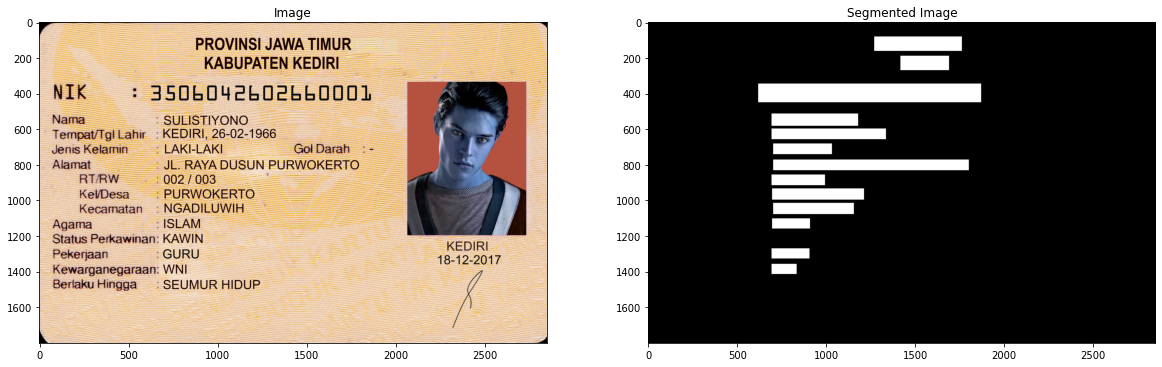

In [ ]:
img=cv2.imread('/content/new_data/Sample/'+image_list[0]+'.png')
seg=cv2.imread('/content/new_data/mask/'+image_list[0]+'_mask.png')
print(img.shape)
visualize(img,seg)

In [ ]:
random.shuffle(image_list)
file_train=image_list[0:int(0.75*len(image_list))]
file_test=image_list[int(0.75*len(image_list)):]

In [ ]:
def unet(pretrained_weights = None,input_size = (512,512,1)):
    inputs = Input(input_size)
    s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
    
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
    
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
    
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
    
    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
    
    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
    
    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
    
    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
    model = Model(inputs,outputs)
    model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

#model = FCN(n_classes=2,  
            #  input_height=320, 
            #  input_width=320)
model=unet()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 512, 512, 1)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 16  160         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

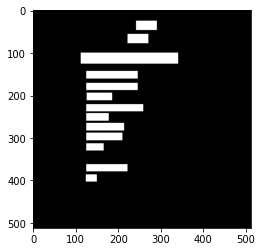

In [ ]:
img,seg=next(batch_generator(file_train,2,1))
plt.imshow(np.squeeze(seg[:,:,:,0],axis=0),cmap='gray')

In [ ]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('weights{epoch:08d}.h5', 
                                     save_weights_only=True, period=1)
model.fit_generator(batch_generator(file_train,2,2),epochs=5,steps_per_epoch=1000,validation_data=batch_generator(file_test,2,2),
                    validation_steps=400,callbacks=[mc],shuffle=1)
model.save('my_model.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/5
1000/1000 [==============================] - 723s 719ms/step - loss: 0.3063 - accuracy: 0.9149 - val_loss: 0.1141 - val_accuracy: 0.9467
Epoch 2/5
1000/1000 [==============================] - 715s 715ms/step - loss: 0.2117 - accuracy: 0.9549 - val_loss: 0.0705 - val_accuracy: 0.9672
Epoch 3/5
1000/1000 [==============================] - 715s 715ms/step - loss: 0.0729 - accuracy: 0.9701 - val_loss: 0.0640 - val_accuracy: 0.9754
Epoch 4/5
1000/1000 [==============================] - 722s 722ms/step - loss: 0.1516 - accuracy: 0.9781 - val_loss: 0.0351 - val_accuracy: 0.9863
Epoch 5/5
1000/1000 [==============================] - 727s 727ms/step - loss: 0.0545 - accuracy: 0.9829 - val_loss: 0.0352 - val_accuracy: 0.9870


In [ ]:
# img=cv2.imread(f'/content/ktp7.jpg',0)
# print(img.shape)
img1=cv2.imread(f'/content/10.jpg',0)
print(img1.shape)

(994, 1653)


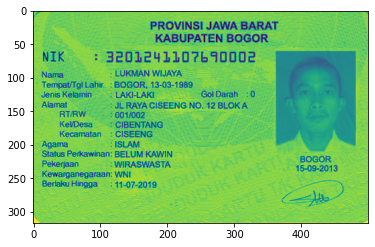

In [ ]:
import seaborn as sns
img=cv2.imread(f'/content/FAKE-KTP.jpg',0)
plt.imshow(img)
ret,img=cv2.threshold(img,255,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU,img)
img=cv2.resize(img,(512,512))
img= np.expand_dims(img,axis=-1)
img=img/255


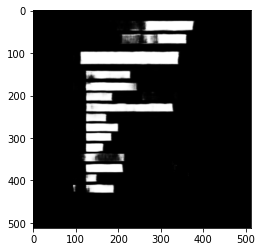

In [ ]:
img=np.expand_dims(img,axis=0)
pred=model.predict(img)
pred=np.squeeze(np.squeeze(pred,axis=0),axis=-1)
plt.imshow(pred,cmap='gray')

In [ ]:
plt.imsave('test_img_mask.JPG',pred)
coordinates=[]

True

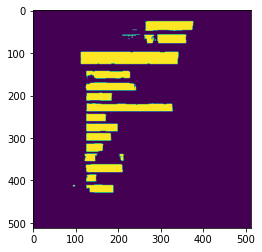

In [ ]:
import cv2
img = cv2.imread('/content/test_img_mask.JPG',0) 
cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU,img)
ori_img=cv2.imread('/content/FAKE-KTP.jpg')
ori_img=cv2.resize(ori_img,(512,512))
contours, hier = cv2.findContours(img, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
i=0
for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    # draw a white rectangle to visualize the bounding rect
    cv2.rectangle(ori_img, (x, y), (x+w,y+h), 255, 1)
    # coordinates.append((x,y,(x+w),(y+h)))
    if w>100 and h>100:
      new=ori_img[y:y+h,x:x+w]
      cv2.imwrite('/content/test1/test_{}.png'.format(i),new)
      i+=1
    
cv2.drawContours(img, contours, 1, (512, 512, 1), 1)
plt.imshow(img)
cv2.imwrite("output.png",ori_img)
# print(contours)
# coordinates.split

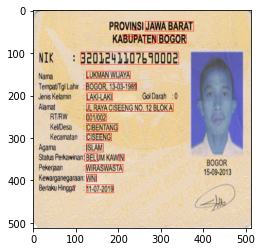

In [ ]:
ori=cv2.imread('/content/output.png')
# ori=cv2.resize(ori,(512,512))
plt.imshow(ori)
# model.save('my_model.h5')